In [38]:
#importing libraries
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
import hvplot.pandas
import scipy.stats as stats
import random

In [2]:
def read_gpd(path):
    gdf = pd.read_csv(path)
    gdf["geometry"] = gpd.GeoSeries.from_wkt(gdf["geometry"])
    gdf = gpd.GeoDataFrame(gdf, geometry="geometry")
    return gdf

In [47]:
#importing data from previous chunk of code
# reduced_r_public_gdf = read_gpd("output_data/reduced_r_public_gdf.csv")
# reduced_q_public_gdf = read_gpd("output_data/reduced_r_public_gdf.csv")
# reduced_k_public_gdf = read_gpd("output_data/reduced_r_public_gdf.csv")
# reduced_x_public_gdf = read_gpd("output_data/reduced_r_public_gdf.csv")
# reduced_m_public_gdf = read_gpd("output_data/reduced_r_public_gdf.csv")

r_crimes_gdf = read_gpd("output_data/r_crimes_gdf.csv")
q_crimes_gdf = read_gpd("output_data/q_crimes_gdf.csv")
k_crimes_gdf = read_gpd("output_data/k_crimes_gdf.csv")
x_crimes_gdf = read_gpd("output_data/x_crimes_gdf.csv")
m_crimes_gdf = read_gpd("output_data/m_crimes_gdf.csv")

OBJECTID        int64
Offense        object
Latitude      float64
Longitude     float64
geometry     geometry
dtype: object

**Finding the Control Data**

- what i want to do is grab a random series of coordinates within staten island and see the number of crimes occured in the same radius
- then compare them to library/park data to see if there is a significant difference

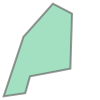

In [6]:
# Coordinates for the polygon of staten island
# Coordinates determined by HeadWall photonics (http://apps.headwallphotonics.com)

staten_island_poly = Polygon([
    (40.5004753162685, -74.24873416273303),
    (40.54484131402899, -74.24221103040881),
    (40.554754403637595, -74.20753543226428),
    (40.6379143073708, -74.19174258558459),
    (40.64130107521177, -74.07844607679553),
    (40.60195187161857, -74.05784671156115),
    (40.5411887532192, -74.1261679395885)
])
staten_island_poly

In [7]:
# Coordinates for the polygon of Queens
# Coordinates determined by HeadWall photonics (http://apps.headwallphotonics.com)
queens_annex_poly = Polygon([
(40.544722434447046, -73.93797369602206),
(40.555385486761516, -73.90892000797274),
(40.56430266845497, -73.87422295215609),
(40.575826406702106, -73.83815260532381),
(40.58804885372343, -73.7889287054825),
(40.594533991890565, -73.7371298849869),
(40.61069521681332, -73.74365301731112),
(40.613431811532955, -73.76854391696932),
(40.60614795792396, -73.78278036894753),
(40.59782058407185, -73.80319663049605),
(40.584291633723474, -73.83029624343683),
(40.58121867054795, -73.85256645320513),
(40.57262741027578, -73.8694636565261),
(40.567027360883614, -73.8789422264483),
(40.56768636153804, -73.89254066941739),
(40.5643238418201, -73.91088555213356),
(40.5557723879539, -73.93727563494873)

])
queens_poly = Polygon([
(40.65034357145685, -73.82444294504265),
(40.646436276566554, -73.8491621833239),
(40.69161667259464, -73.86512669138054),
(40.67801369382192, -73.89731319955925),
(40.683220903619834, -73.9052096228991),
(40.692983325573486, -73.89851482919792),
(40.708990601507054, -73.9216891150866),
(40.71284805224667, -73.91665389230275),
(40.72870471211942, -73.92895333667934),
(40.739615309797415, -73.96116550078247),
(40.769882760654, -73.93627460112427),
(40.788700149775686, -73.91001041045044),
(40.77752188089111, -73.89284427275513),
(40.77258204651135, -73.88391788115356),
(40.779861674239875, -73.87636478056763),
(40.76920194820335, -73.86022861113403),
(40.76317126236197, -73.86134294326233),
(40.75714002927082, -73.84597778320312),
(40.790339654182766, -73.85172990615295),
(40.79857705399254, -73.82040317168091),
(40.79438604712569, -73.79748637785767),
(40.788375226649194, -73.79242236723755),
(40.79584805631508, -73.77783115019653),
(40.788050301932834, -73.77199466338013),
(40.783436199383075, -73.77276713957642),
(40.763806435034766, -73.75388438811157),
(40.777261898765104, -73.75474269499634),
(40.782461347967335, -73.75100906004761),
(40.777222312480966, -73.74372204116173),
(40.77410244574748, -73.73350818923302),
(40.7520036188566, -73.70152473449707),
(40.73930688199643, -73.70016912880567),
(40.73454276165232, -73.71391972428614),
(40.72549366362228, -73.72354160405762),
(40.71592289198027, -73.72870028802832),
(40.686755018399005, -73.72391145479783),
(40.66509279923652, -73.72922658200358),
(40.65295818817826, -73.72226135596561),
(40.64752931634277, -73.74387774919037),
(40.63276215230612, -73.74625512792501),
(40.64517152217268, -73.7499799171326),
(40.66399382571134, -73.78901518890714),
(40.66230886467904, -73.82108048343278),

])
list = [queens_poly, queens_annex_poly]
queens_poly = MultiPolygon(list)

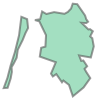

In [8]:
queens_poly

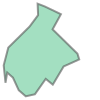

In [32]:
#brooklyn polygon

brooklyn_poly = Polygon([
(40.64127636633028, -74.03672772193043),
(40.665206807122736, -74.00273876929373),
(40.680797672117805, -74.01544171118826),
(40.70471393521108, -73.97527294898123),
(40.7390277153181, -73.95982342505545),
(40.735186589776674, -73.94724922919363),
(40.6803339046364, -73.89347630286306),
(40.69867873585417, -73.86008816504568),
(40.66247233400528, -73.84275036597342),
(40.64733304413664, -73.83691387915701),
(40.648358717407405, -73.86214810156912),
(40.62958477279449, -73.88738232398123),
(40.58263496256981, -73.93373089575856),
(40.57249781744687, -73.97286968970388),
(40.57644203395298, -74.01132183814138),
(40.58023934501919, -73.98883419776053),
(40.592900923152676, -73.99999218726248),
(40.605706721531234, -74.02780133032888),
(40.621148619215376, -74.04119091773123)
])
brooklyn_poly


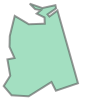

In [10]:
#bronx polygon

bronx_poly = Polygon([
(40.91513058178467, -73.91080710258225),
(40.88204341007443, -73.79356238212327),
(40.86911004099939, -73.80326625829538),
(40.866041005635, -73.79975220844207),
(40.879800224550394, -73.7901391713327),
(40.87872564414774, -73.7849893300241),
(40.857533615809935, -73.78962418720184),
(40.83737380280887, -73.78258607074676),
(40.84604230007938, -73.79134080097137),
(40.85548869693003, -73.79288575336395),
(40.84857852720188, -73.79863140111765),
(40.8611871348291, -73.80477079953083),
(40.86160613917069, -73.81482876762452),
(40.83584540657383, -73.81573787862449),
(40.813192836740406, -73.80222743396038),
(40.80519634635972, -73.83470298928839),
(40.804794797576385, -73.8522755599053),
(40.81283869275497, -73.87019145327612),
(40.80139286186507, -73.87231449996725),
(40.80592901156586, -73.89864180080876),
(40.79539168596511, -73.91535606454093),
(40.808102661910745, -73.9302451632943),
(40.835595376944696, -73.93187089498073),
(40.872423309741876, -73.90877738838587),
(40.87950439499268, -73.92283341571746)
])
bronx_poly

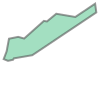

In [11]:
#manhattan polygon
manhattan_poly = Polygon([
    (40.70112077942011, -74.01424996444936),
    (40.70658644332001, -73.9998304087853),
    (40.7110106998642, -73.97614113876577),
    (40.7281844393501, -73.9727079112267),
    (40.73937100705069, -73.97579781601186),
    (40.77629933343638, -73.94283883163686),
    (40.7820187880502, -73.94386879989858),
    (40.799434093408316, -73.92944924423452),
    (40.83499869130992, -73.93549954885219),
    (40.8721019057399, -73.91065080561826),
    (40.87431158693697, -73.92697195081404),
    (40.754526709299185, -74.00696615247419),
    (40.72010588058742, -74.01290697851486),
    (40.71850336599253, -74.01553406878129),
    (40.7090937935794, -74.01747451353991),
])
manhattan_poly

In [12]:
# Defining the randomization generator
#code adjusted from online source published by Ayush Sethi

def polygon_random_points (poly, num_points):
    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    while len(points) < num_points:
            random_point = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
            if (random_point.within(poly)):
                points.append(random_point)
    return points

In [13]:
# Choose the number of points desired. This method uses 100 points. 
r_points = polygon_random_points(staten_island_poly, 100)
q_points = polygon_random_points(queens_poly, 100)
k_points = polygon_random_points(brooklyn_poly, 100)
x_points = polygon_random_points(bronx_poly, 100)
m_points = polygon_random_points(manhattan_poly, 100)


In [14]:
def random_gdf(points):
    random_gdf = gpd.GeoDataFrame(points,
                                geometry= points,
                                crs= "EPSG:4326")
    #this step is for mapping later
    random_gdf['Latitude'] = random_gdf['geometry'].x
    random_gdf['Longitude'] = random_gdf['geometry'].y

    #converting to meters
    random_gdf = random_gdf.to_crs(3857)
    return random_gdf

In [15]:
#creating a gdf for each burough
r_random_gdf = random_gdf(r_points)
q_random_gdf = random_gdf(q_points)
k_random_gdf = random_gdf(k_points)
x_random_gdf = random_gdf(x_points)
m_random_gdf = random_gdf(m_points)

In [16]:
#repeating method to get number of crimes within a mile radius of each random point
#create empty list to hold the number of crimes commited within a 1 mile radius of each location
crimes_per_location = []

#NOTE: radius is in meters
def crimesper (crimes_gdf, public_gdf, radius):
    radius = radius
    for offense in crimes_gdf["Offense"]:
        crimes_per_location = []
        crimes_gdf_each = crimes_gdf[crimes_gdf["Offense"] == offense]

        for i in range(len(public_gdf)):

            # Calculate the distances between all pairs of points
            distances = gpd.GeoSeries(crimes_gdf_each.geometry).distance(public_gdf.geometry.iloc[i])

            # Filter the pairs where the distance is within the radius
            within_radius = distances <= radius

            # Count the number of points within the radius for each point in gdf2
            count_within_radius = within_radius.sum()
            
            crimes_per_location.append(count_within_radius)
        public_gdf[offense] = crimes_per_location

    #creating a column for the sum amount of offenses
    public_gdf["Total Crimes"] = public_gdf[['ROBBERY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE']].sum(axis=1)

,OBJECTID,Complaint ID,Offense,Latitude,Longitude,geometry
0,1,261214832,ROBBERY,40.643566,-74.074001,POINT (4524421.071 -12545498.932)
1,2,261233859,ROBBERY,40.635961,-74.161365,POINT (4523574.486 -12581036.663)
2,3,261233841,ROBBERY,40.643569,-74.098338,POINT (4524421.405 -12555379.561)
3,4,261261343,ROBBERY,40.630408,-74.142977,POINT (4522956.329 -12573540.993)
4,5,261347872,ROBBERY,40.630539,-74.076641,POINT (4522970.912 -12546570.040)


In [43]:
k_crimes_gdf.head()

,OBJECTID,Offense,Latitude,Longitude,geometry
0,1,ROBBERY,40.643566,-74.074001,POINT (4524421.071 -12545498.932)
1,2,ROBBERY,40.635961,-74.161365,POINT (4523574.486 -12581036.663)
2,3,ROBBERY,40.643569,-74.098338,POINT (4524421.405 -12555379.561)
3,4,ROBBERY,40.630408,-74.142977,POINT (4522956.329 -12573540.993)
4,5,ROBBERY,40.630539,-74.076641,POINT (4522970.912 -12546570.040)


**Warning: Code will take a long time to run**
- possibly up to 10 mins

In [17]:
#crimes near random locations in Staten Island
crimesper(r_crimes_gdf, r_random_gdf, 1609)

In [18]:
#crimes near random locations in Queens
    #NOTE: this took 40 mins to run
    # the data is already exported to a csv file so just look at it from there
crimesper(q_crimes_gdf, q_random_gdf, 1609)

In [50]:
#crimes near random locations in Brooklyn
    #i dont want to talk about how long this took to run
crimesper(k_crimes_gdf, k_random_gdf, 1609)

In [20]:
#crimes near random locations in the Bronx
crimesper(x_crimes_gdf, x_random_gdf, 1609)

In [21]:
#crimes near random locations in Manhattan
crimesper(m_crimes_gdf, m_random_gdf, 1609)

In [51]:
path = "C:/Users/54qb3/Documents/Project-1/output_data/"
pd.DataFrame(r_random_gdf).to_csv(f"{path}r_random_gdf.csv")
pd.DataFrame(q_random_gdf).to_csv(f"{path}q_random_gdf.csv")
pd.DataFrame(k_random_gdf).to_csv(f"{path}k_random_gdf.csv")
pd.DataFrame(x_random_gdf).to_csv(f"{path}x_random_gdf.csv")
pd.DataFrame(m_random_gdf).to_csv(f"{path}m_random_gdf.csv")

**Visuals to help conceptualize the data, unofficial**

In [49]:
k_crimes_map = k_crimes_gdf.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    alpha = 0.5,
    #hover_cols = ['ROBBERY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'Total Crimes']
)
k_crimes_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]

In [52]:
k_random_map = k_random_gdf.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    alpha = 0.5,
    hover_cols = ['ROBBERY', 'MURDER & NON-NEGL. MANSLAUGHTER', 'RAPE', 'Total Crimes']
)
k_random_map

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (ROBBERY,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,Total Crimes)

In [35]:
k_random_gdf.tail()

,0,geometry,Latitude,Longitude,ROBBERY,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,Total Crimes
95,POINT (40.60474369413559 -73.98589146588209),POINT (4520099.392 -12509849.755),40.604744,-73.985891,0,0,0,0
96,POINT (40.66782495435683 -73.91192323773511),POINT (4527121.566 -12480069.337),40.667825,-73.911923,0,0,0,0
97,POINT (40.62495983039095 -74.00501967326358),POINT (4522349.842 -12517572.778),40.624960,-74.005020,0,0,0,0
98,POINT (40.65065331578029 -73.85854427307797),POINT (4525210.028 -12458661.078),40.650653,-73.858544,0,0,0,0
99,POINT (40.62980856092299 -73.97155133612425),POINT (4522889.600 -12504065.810),40.629809,-73.971551,0,0,0,0


In [34]:
r_random_gdf.tail()

,0,geometry,Latitude,Longitude,ROBBERY,MURDER & NON-NEGL. MANSLAUGHTER,RAPE,Total Crimes
95,POINT (40.64010831469341 -74.08389195960821),POINT (4524036.163 -12549512.808),40.640108,-74.083892,26,0,0,26
96,POINT (40.52965352963101 -74.16480765953125),POINT (4511740.393 -12582440.968),40.529654,-74.164808,1,0,0,1
97,POINT (40.55062251058078 -74.20358195316417),POINT (4514074.649 -12598278.082),40.550623,-74.203582,1,0,0,1
98,POINT (40.62745330112673 -74.1731098166578),POINT (4522627.414 -12585828.750),40.627453,-74.173110,7,1,0,8
99,POINT (40.60826445067599 -74.16067278786251),POINT (4520491.321 -12580754.337),40.608264,-74.160673,1,0,0,1
